# ASSIGNMENT 4

by Rongxin Hu & Minh Ngan Nguyen

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Global settings
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
np.random.seed(42)


# Exercise 1

In [ ]:
# Exercise 1: Effect of Sample Size
# Modify the code to investigate how the sample size affects Lasso’s ability to recover the true coefficients.
# Try n_samples = [100, 200, 1000] and plot the feature selection performance.


In [ ]:
# Parameter settings
sample_sizes = [100, 200, 500, 1000]
n_features = 50
n_informative = 10
noise_level = 1.0
results_ex1 = []


In [ ]:
for n_samples in sample_sizes:
    # Generate synthetic data
    X = np.random.randn(n_samples, n_features)
    true_coefficients = np.zeros(n_features)
    informative_features = np.random.choice(n_features, n_informative, replace=False)

    # Assign non-zero coefficients to informative features
    for idx in informative_features:
        true_coefficients[idx] = np.random.randn() * 3

    # Create target variable with noise
    Y = X @ true_coefficients + np.random.randn(n_samples) * noise_level

    # Split into train/test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Find optimal alpha using cross-validation
    lasso_cv = LassoCV(cv=5, max_iter=10000)
    lasso_cv.fit(X_train_scaled, Y_train)

    # Train Lasso model with optimal alpha
    lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=10000)
    lasso.fit(X_train_scaled, Y_train)

    # Evaluate performance
    Y_pred = lasso.predict(X_test_scaled)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Feature selection metrics
    true_positives = np.sum((lasso.coef_ != 0) & (true_coefficients != 0))
    false_positives = np.sum((lasso.coef_ != 0) & (true_coefficients == 0))
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / n_informative
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Store results
    results_ex1.append({
        'Sample Size': n_samples,
        'Test MSE': mse,
        'Test R²': r2,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Features Selected': np.sum(lasso.coef_ != 0),
        'Optimal Alpha': lasso_cv.alpha_
    })

    # Print summary
    print(f"Sample Size: {n_samples}, Optimal Alpha: {lasso_cv.alpha_:.4f}")
    print(f"Test MSE: {mse:.4f}, Test R²: {r2:.4f}")
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(f"Features Selected: {np.sum(lasso.coef_ != 0)}/{n_informative} informative features\n")


Sample Size: 100, Optimal Alpha: 0.1144
Test MSE: 2.4187, Test R²: 0.9813
Precision: 0.53, Recall: 0.90, F1 Score: 0.67
Features Selected: 17/10 informative features

Sample Size: 200, Optimal Alpha: 0.0947
Test MSE: 1.1225, Test R²: 0.9908
Precision: 0.59, Recall: 1.00, F1 Score: 0.74
Features Selected: 17/10 informative features

Sample Size: 500, Optimal Alpha: 0.0526
Test MSE: 0.9042, Test R²: 0.9914
Precision: 0.43, Recall: 1.00, F1 Score: 0.61
Features Selected: 23/10 informative features

Sample Size: 1000, Optimal Alpha: 0.0413
Test MSE: 1.1282, Test R²: 0.9893
Precision: 0.45, Recall: 1.00, F1 Score: 0.62
Features Selected: 22/10 informative features



In [ ]:
results_df_ex1 = pd.DataFrame(results_ex1)

plt.figure(figsize=(12, 10))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Effect of Sample Size on Test MSE')

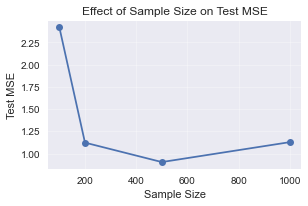

In [ ]:
# Test MSE
plt.subplot(2, 2, 1)
plt.plot(results_df_ex1['Sample Size'], results_df_ex1['Test MSE'], 'o-')
plt.xlabel('Sample Size')
plt.ylabel('Test MSE')
plt.title('Effect of Sample Size on Test MSE')


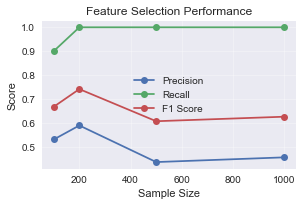

In [ ]:
# Feature selection metrics
plt.subplot(2, 2, 2)
plt.plot(results_df_ex1['Sample Size'], results_df_ex1['Precision'], 'o-', label='Precision')
plt.plot(results_df_ex1['Sample Size'], results_df_ex1['Recall'], 'o-', label='Recall')
plt.plot(results_df_ex1['Sample Size'], results_df_ex1['F1 Score'], 'o-', label='F1 Score')
plt.xlabel('Sample Size')
plt.ylabel('Score')
plt.title('Feature Selection Performance')
plt.legend()

Text(0.5, 1.0, 'Optimal Regularization Strength')

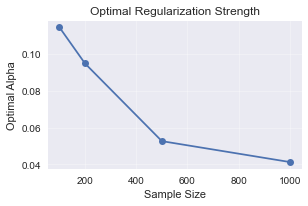

In [ ]:
# Optimal Alpha
plt.subplot(2, 2, 3)
plt.plot(results_df_ex1['Sample Size'], results_df_ex1['Optimal Alpha'], 'o-')
plt.xlabel('Sample Size')
plt.ylabel('Optimal Alpha')
plt.title('Optimal Regularization Strength')


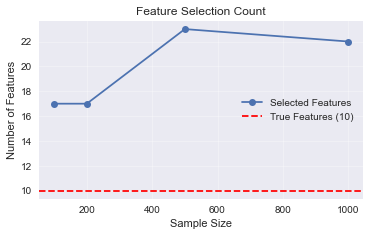

In [ ]:
# Features selected
plt.subplot(2, 2, 4)
plt.plot(results_df_ex1['Sample Size'], results_df_ex1['Features Selected'], 'o-', label='Selected Features')
plt.axhline(y=n_informative, color='r', linestyle='--', label=f'True Features ({n_informative})')
plt.xlabel('Sample Size')
plt.ylabel('Number of Features')
plt.title('Feature Selection Count')
plt.legend()

plt.tight_layout()
plt.savefig('exercise1_results.png', dpi=300)
plt.show()

# Exercise 2

In [ ]:
# Exercise 2: Effect of Sparsity Level
# Change the number of informative features (n_informative) to see how sparsity affects performance.
# Try values like 5, 20, 50, and 100.

In [ ]:
# Parameter settings
n_samples = 200
n_features = 50
sparsity_levels = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]  # 10%, 20%, 40%, 60%, 80%, 100% informative
noise_level = 1.0
results_ex2 = []


In [ ]:
for sparsity in sparsity_levels:
    n_informative = int(n_features * sparsity)

    # Generate synthetic data
    X = np.random.randn(n_samples, n_features)
    true_coefficients = np.zeros(n_features)
    informative_features = np.random.choice(n_features, n_informative, replace=False)

    # Assign non-zero coefficients
    for idx in informative_features:
        true_coefficients[idx] = np.random.randn() * 3

    # Create target variable with noise
    Y = X @ true_coefficients + np.random.randn(n_samples) * noise_level

    # Split into train/test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Find optimal alpha using cross-validation
    lasso_cv = LassoCV(cv=5, max_iter=10000)
    lasso_cv.fit(X_train_scaled, Y_train)

    # Train Lasso model with optimal alpha
    lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=10000)
    lasso.fit(X_train_scaled, Y_train)

    # Evaluate performance
    Y_pred = lasso.predict(X_test_scaled)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Feature selection metrics
    true_positives = np.sum((lasso.coef_ != 0) & (true_coefficients != 0))
    false_positives = np.sum((lasso.coef_ != 0) & (true_coefficients == 0))
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / n_informative
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Store results
    results_ex2.append({
        'Sparsity Level': sparsity,
        'Informative Features': n_informative,
        'Test MSE': mse,
        'Test R²': r2,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Features Selected': np.sum(lasso.coef_ != 0),
        'Optimal Alpha': lasso_cv.alpha_
    })

    # Print summary
    print(f"Sparsity Level: {sparsity:.0%}, Informative Features: {n_informative}/{n_features}")
    print(f"Test MSE: {mse:.4f}, Test R²: {r2:.4f}")
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(f"Features Selected: {np.sum(lasso.coef_ != 0)}/{n_informative} informative features\n")


Sparsity Level: 10%, Informative Features: 5/50
Test MSE: 1.2700, Test R²: 0.9832
Precision: 0.26, Recall: 1.00, F1 Score: 0.42
Features Selected: 19/5 informative features

Sparsity Level: 20%, Informative Features: 10/50
Test MSE: 1.3708, Test R²: 0.9732
Precision: 0.56, Recall: 1.00, F1 Score: 0.71
Features Selected: 18/10 informative features

Sparsity Level: 40%, Informative Features: 20/50
Test MSE: 1.9534, Test R²: 0.9933
Precision: 0.66, Recall: 0.95, F1 Score: 0.78
Features Selected: 29/20 informative features

Sparsity Level: 60%, Informative Features: 30/50
Test MSE: 2.4325, Test R²: 0.9947
Precision: 0.64, Recall: 0.97, F1 Score: 0.77
Features Selected: 45/30 informative features

Sparsity Level: 80%, Informative Features: 40/50
Test MSE: 1.6027, Test R²: 0.9962
Precision: 0.82, Recall: 1.00, F1 Score: 0.90
Features Selected: 49/40 informative features

Sparsity Level: 100%, Informative Features: 50/50
Test MSE: 1.6886, Test R²: 0.9961
Precision: 1.00, Recall: 1.00, F1 Scor

In [ ]:
results_df_ex2 = pd.DataFrame(results_ex2)

plt.figure(figsize=(12, 10))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Effect of Sparsity on Test MSE')

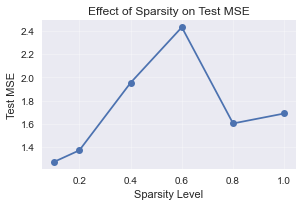

In [ ]:
# Test MSE
plt.subplot(2, 2, 1)
plt.plot(results_df_ex2['Sparsity Level'], results_df_ex2['Test MSE'], 'o-')
plt.xlabel('Sparsity Level')
plt.ylabel('Test MSE')
plt.title('Effect of Sparsity on Test MSE')

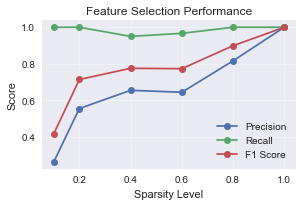

In [ ]:
# Feature selection metrics
plt.subplot(2, 2, 2)
plt.plot(results_df_ex2['Sparsity Level'], results_df_ex2['Precision'], 'o-', label='Precision')
plt.plot(results_df_ex2['Sparsity Level'], results_df_ex2['Recall'], 'o-', label='Recall')
plt.plot(results_df_ex2['Sparsity Level'], results_df_ex2['F1 Score'], 'o-', label='F1 Score')
plt.xlabel('Sparsity Level')
plt.ylabel('Score')
plt.title('Feature Selection Performance')
plt.legend()


Text(0.5, 1.0, 'Optimal Regularization Strength')

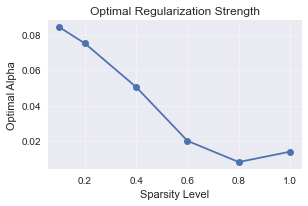

In [ ]:
# Optimal Alpha
plt.subplot(2, 2, 3)
plt.plot(results_df_ex2['Sparsity Level'], results_df_ex2['Optimal Alpha'], 'o-')
plt.xlabel('Sparsity Level')
plt.ylabel('Optimal Alpha')
plt.title('Optimal Regularization Strength')


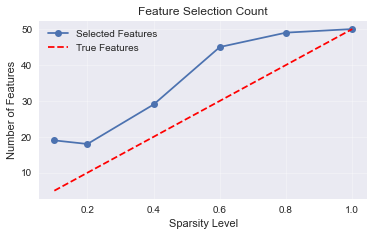

In [ ]:
# Features selected
plt.subplot(2, 2, 4)
plt.plot(results_df_ex2['Sparsity Level'], results_df_ex2['Features Selected'], 'o-', label='Selected Features')
plt.plot(results_df_ex2['Sparsity Level'], results_df_ex2['Informative Features'], 'r--', label='True Features')
plt.xlabel('Sparsity Level')
plt.ylabel('Number of Features')
plt.title('Feature Selection Count')
plt.legend()

plt.tight_layout()
plt.savefig('exercise2_results.png', dpi=300)
plt.show()


# Exercise 3

In [ ]:
# Exercise 3: Effect of Feature Correlation
# Modify the data generating process to include correlated features.
# How does this affect Lasso’s performance?


In [ ]:
# Parameter settings
n_samples = 200
n_features = 50
n_informative = 10
noise_level = 1.0
correlation_levels = [0.0, 0.3, 0.6, 0.9]  # Different correlation levels
results_ex3 = []


In [ ]:
for corr_level in correlation_levels:
    # Create correlation matrix
    corr_matrix = np.eye(n_features)

    # Add correlation between features
    for i in range(n_features):
        for j in range(i+1, n_features):
            # Correlation decays with distance between features
            distance = abs(i - j)
            corr = corr_level * (0.8 ** distance)
            corr_matrix[i, j] = corr
            corr_matrix[j, i] = corr

    # Ensure positive definiteness
    corr_matrix += np.eye(n_features) * 0.01

    # Generate correlated features
    X = np.random.multivariate_normal(
        mean=np.zeros(n_features),
        cov=corr_matrix,
        size=n_samples
    )

    # Create true coefficients
    true_coefficients = np.zeros(n_features)
    informative_features = np.random.choice(n_features, n_informative, replace=False)

    # Assign coefficients with correlated patterns
    for idx in informative_features:
        true_coefficients[idx] = np.random.randn() * 3
        # Add correlation to adjacent features
        if idx > 0:
            true_coefficients[idx-1] = true_coefficients[idx] * 0.3 * np.random.choice([-1, 1])
        if idx < n_features - 1:
            true_coefficients[idx+1] = true_coefficients[idx] * 0.3 * np.random.choice([-1, 1])

    # Create target variable
    Y = X @ true_coefficients + np.random.randn(n_samples) * noise_level

    # Split into train/test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Find optimal alpha using cross-validation
    lasso_cv = LassoCV(cv=5, max_iter=10000)
    lasso_cv.fit(X_train_scaled, Y_train)

    # Train Lasso model with optimal alpha
    lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=10000)
    lasso.fit(X_train_scaled, Y_train)

    # Evaluate performance
    Y_pred = lasso.predict(X_test_scaled)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Feature selection metrics
    true_positives = np.sum((lasso.coef_ != 0) & (true_coefficients != 0))
    false_positives = np.sum((lasso.coef_ != 0) & (true_coefficients == 0))
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / n_informative
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Store results
    results_ex3.append({
        'Correlation Level': corr_level,
        'Test MSE': mse,
        'Test R²': r2,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Features Selected': np.sum(lasso.coef_ != 0),
        'Optimal Alpha': lasso_cv.alpha_
    })

    # Print summary
    print(f"Correlation Level: {corr_level:.1f}")
    print(f"Test MSE: {mse:.4f}, Test R²: {r2:.4f}")
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(f"Features Selected: {np.sum(lasso.coef_ != 0)}/{n_informative} informative features\n")


Correlation Level: 0.0
Test MSE: 1.1835, Test R²: 0.9843
Precision: 0.62, Recall: 2.60, F1 Score: 1.00
Features Selected: 42/10 informative features

Correlation Level: 0.3
Test MSE: 1.1303, Test R²: 0.9948
Precision: 0.54, Recall: 2.10, F1 Score: 0.86
Features Selected: 39/10 informative features

Correlation Level: 0.6
Test MSE: 1.3472, Test R²: 0.9351
Precision: 0.66, Recall: 1.90, F1 Score: 0.97
Features Selected: 29/10 informative features

Correlation Level: 0.9
Test MSE: 0.9401, Test R²: 0.9906
Precision: 0.51, Recall: 2.00, F1 Score: 0.82
Features Selected: 39/10 informative features



In [ ]:
results_df_ex3 = pd.DataFrame(results_ex3)

plt.figure(figsize=(12, 10))


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Effect of Correlation on Test MSE')

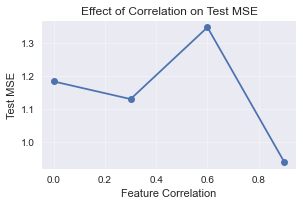

In [ ]:
# Test MSE
plt.subplot(2, 2, 1)
plt.plot(results_df_ex3['Correlation Level'], results_df_ex3['Test MSE'], 'o-')
plt.xlabel('Feature Correlation')
plt.ylabel('Test MSE')
plt.title('Effect of Correlation on Test MSE')


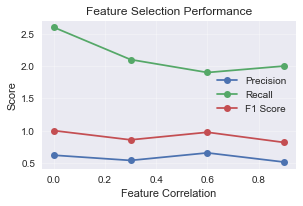

In [ ]:
# Feature selection metrics
plt.subplot(2, 2, 2)
plt.plot(results_df_ex3['Correlation Level'], results_df_ex3['Precision'], 'o-', label='Precision')
plt.plot(results_df_ex3['Correlation Level'], results_df_ex3['Recall'], 'o-', label='Recall')
plt.plot(results_df_ex3['Correlation Level'], results_df_ex3['F1 Score'], 'o-', label='F1 Score')
plt.xlabel('Feature Correlation')
plt.ylabel('Score')
plt.title('Feature Selection Performance')
plt.legend()


Text(0.5, 1.0, 'Optimal Regularization Strength')

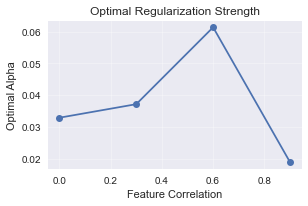

In [ ]:
# Optimal Alpha
plt.subplot(2, 2, 3)
plt.plot(results_df_ex3['Correlation Level'], results_df_ex3['Optimal Alpha'], 'o-')
plt.xlabel('Feature Correlation')
plt.ylabel('Optimal Alpha')
plt.title('Optimal Regularization Strength')


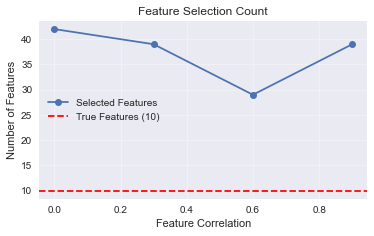

In [ ]:
# Features selected
plt.subplot(2, 2, 4)
plt.plot(results_df_ex3['Correlation Level'], results_df_ex3['Features Selected'], 'o-', label='Selected Features')
plt.axhline(y=n_informative, color='r', linestyle='--', label=f'True Features ({n_informative})')
plt.xlabel('Feature Correlation')
plt.ylabel('Number of Features')
plt.title('Feature Selection Count')
plt.legend()

plt.tight_layout()
plt.savefig('exercise3_results.png', dpi=300)
plt.show()


# Interpretation

In [ ]:
# Exercise 3: Interpretation
# Write a short report (200-300 words) explaining:
# 1. Why does Lasso perform feature selection while Ridge doesn’t?
# 2. In what situations would you prefer Lasso over Ridge?
# 3. What are the limitations of Lasso for feature selection?


1. Why does Lasso perform feature selection while Ridge doesn't?

Lasso regression performs feature selection due to the nature of its regularization. In particular, Lasso applies an L1 penalty, which adds the absolute values of the coefficients to the loss function. This type of penalty encourages some coefficients to become exactly zero.

Graphically, L1 regularization creates diamond-shaped constraint region that tends to intersect the loss function at the axes, setting coefficients to zero.
As a result, Lasso not only reduces the magnitude of coefficients, but also removes some features from the model entirely.

In contrast, Ridge regression uses an L2 penalty, which adds the squares of the coefficients. Graphically, L2 regularization creates a circular constraint region. This penalty reduces the size of all coefficients but does not set any of them to zero.

Therefore, Ridge shrinks coefficients but retains all features in the model, instead of selecting them.

2. In what situations would you prefer Lasso over Ridge?

Lasso is preferred when the model is sparse, with fewer informative features. The situation is simulated in the Exercise 2. It is especially useful when the number of features exceeds or is close to the number of observations. In such cases, Lasso helps to reduce overfitting and improve model interpretability by selecting a smaller subset of features.

However, when features are believed to contribute to the outcome and multicollinearity exists, Ridge is more appropriate. Meanwhile, Lasso show that the Precision decreases with the introduction of correlated features (Exhibited by Exercise 3).

3. What are the limitations of Lasso for feature selection?

When features are highly correlated, Lasso tends to select only one and ignore the others, which can lead to instability. It also introduces bias in the estimates of the non-zero coefficients due to the penalty.

Lasso's performance also degrades when the true model is not sparse (illustrated by Exercise 2)

Moreover, when the number of features exceeds the number of observations, Lasso can select at most as many features as there are observations, which may not be sufficient in some cases.

Lasso is also highly sensitive to the value of the regularization parameter (exhibited by comparison between different alphas), and small changes can lead to different sets of selected features. However, by tuning carefully using Cross-Validation, it is possible to choose the optimal parameter alpha.

Finally, it does not perform well when relevant features are grouped, as it may eliminate important variables that belong to a useful group.